In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle

In [2]:
file_list, class_list = [], []

IMG_SIZE = 80
DATADIR = 'Train'
CATEGORIES = ["anticlockwise","clockwise"]

for category in CATEGORIES :
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        #plt.imshow(img_array)

training_data = []

def create_training_data():
    for category in CATEGORIES :
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try :
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                #print(img_array,len(img_array))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()
X, y = [], []

for features, label in training_data:
    X.append(features)
    y.append(label)

#print(len(X),len(y),X[0])




In [3]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
#print(len(X[0]))
y = np.array(y)

# Creating the files containing all the information about your model
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [4]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt

/home/subhodeep/miniconda3/envs/ML/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/subhodeep/miniconda3/envs/ML/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/subhodeep/miniconda3/envs/ML/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/subhodeep/miniconda3/envs/ML/lib/python3

In [5]:
# Opening the files about data
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

# normalizing data (a pixel goes from 0 to 255)
X = X/255.0

In [6]:
# Building the model
model = Sequential()
# 3 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

# The output layer with 2 neurons, for 2 classes
model.add(Dense(2))
model.add(Activation("softmax"))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 78, 78, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 37, 37, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        3

In [8]:
# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Training the model, with 40 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images
history = model.fit(X, y, batch_size=32, epochs=35, validation_split=0.05)

Train on 285 samples, validate on 15 samples
Epoch 1/35
285/285 [==============================] - 1s 2ms/sample - loss: 0.7012 - acc: 0.5088 - val_loss: 0.6461 - val_acc: 1.0000
Epoch 2/35
285/285 [==============================] - 1s 2ms/sample - loss: 0.6873 - acc: 0.5509 - val_loss: 0.6496 - val_acc: 0.7333
Epoch 3/35
285/285 [==============================] - 1s 2ms/sample - loss: 0.6729 - acc: 0.5930 - val_loss: 0.8762 - val_acc: 0.0000e+00
Epoch 4/35
285/285 [==============================] - 1s 2ms/sample - loss: 0.6556 - acc: 0.5930 - val_loss: 0.5771 - val_acc: 0.6000
Epoch 5/35
285/285 [==============================] - 1s 2ms/sample - loss: 0.6174 - acc: 0.6632 - val_loss: 1.0873 - val_acc: 0.0667
Epoch 6/35
285/285 [==============================] - 1s 2ms/sample - loss: 0.6816 - acc: 0.6316 - val_loss: 0.8827 - val_acc: 0.0667
Epoch 7/35
285/285 [==============================] - 1s 2ms/sample - loss: 0.6687 - acc: 0.5965 - val_loss: 0.6278 - val_acc: 0.6000
Epoch 8/35
28

In [9]:
model_json = model.to_json()
with open("model.json", "w") as json_file :
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('CNN.model')

Saved model to disk


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


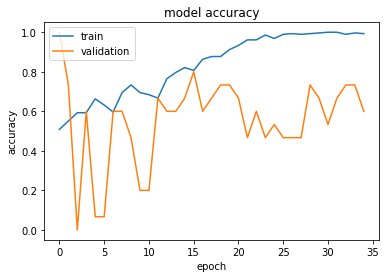

In [10]:
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')